# Тестове завдання 


Спочатку імпортуємо усі потрбні бібліотеки та модулі. Основною для роботи я обрав Scikit learn. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy
import scipy.special
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn import preprocessing
from collections import Counter
plt.style.use('seaborn-whitegrid')

Тепер я зчитую файли з потрібними даними. В train_labels я замінюю усі 2 на 1, оскільки за завданням нам не треба їх розділяти, і тому цим ми збільшуємо клас Шахраїв, що трохи урівноважує два класи. 

In [2]:
train = pd.read_csv(r"C:\Users\kosva\Desktop\Робота\Datasets\train.csv", names = range(112))
train_labels = pd.read_csv(r"C:\Users\kosva\Desktop\Робота\Datasets\train_labels.csv", names = range(1)).replace(2, 1)
test = pd.read_csv(r"C:\Users\kosva\Desktop\Робота\Datasets\test (1).csv", names = range(112))

Подивимося на train та коротку інформацію про моменти та квантілі. 

In [3]:
display(train)
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,9,1354,0,18,0,1,7,9,0,0,...,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,49.0
1,0,239,0,1,0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0
2,0,260,0,4,0,3,6,0,0,0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,56.0
3,17,682,0,1,0,0,8,17,0,0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,65.0
4,1,540,0,2,0,1,7,1,0,0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,0,88,0,0,0,2,-1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,85.0
20464,0,134,0,2,0,0,6,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
20465,4,393,1,1,0,0,-1,4,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
20466,0,10,0,1,0,0,-1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
count,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.0,20468.0,...,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000
mean,3.226256,294.793043,0.420021,2.329343,0.083594,0.939857,2.386066,3.226256,0.0,0.0,...,0.365595,0.004935,0.358120,0.002443,0.308384,0.190737,0.000049,0.049345,0.024282,43.486125
std,20.564308,717.541984,7.367275,10.068512,0.840537,4.222896,3.018140,20.564308,0.0,0.0,...,0.558812,0.073478,0.479459,0.049366,0.461837,0.392892,0.006990,0.216593,0.305079,59.217560
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,0.000000,97.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
75%,2.000000,283.000000,0.000000,2.000000,0.000000,1.000000,6.000000,2.000000,0.0,0.0,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,61.250000
max,2301.000000,37808.000000,904.000000,772.000000,54.000000,230.000000,11.000000,2301.000000,0.0,0.0,...,20.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,747.000000


## Первинна обробка

Для початку подивимось на тип даних у датафреймі. 


In [4]:
train.dtypes

0        int64
1        int64
2        int64
3        int64
4        int64
        ...   
107    float64
108    float64
109    float64
110    float64
111    float64
Length: 112, dtype: object

Бачимо, що всі значення числові, а це те, що нам і потрібно. 
Тепер перевіримо, чи немає пустих комірок, якщо є, то треба буде або від них позубутися, або ж дамо їм середнє значення по стовпчику (перед цим проаналізуємо отриманий датафрейм). 

In [5]:
print(train.isnull().sum()) 

0      0
1      0
2      0
3      0
4      0
      ..
107    0
108    0
109    0
110    0
111    0
Length: 112, dtype: int64


Отже, в нас усі значення - числові, і немає пропущених. 


Тепер віднормуємо та стандартизуємо набори, звівши математичне сподівання до 0, а дисперсію до 1. Для цього використаємо StandardScaler з модуля preprocessing.



In [6]:
train = preprocessing.StandardScaler().fit_transform(train)
train = pd.DataFrame(train)
display(train)

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,0.280772,1.476196,-0.057013,1.556440,-0.099455,0.014242,1.528772,0.280772,0.0,0.0,...,6.503963,-0.067158,-0.746943,-0.049486,1.497569,2.059813,-0.00699,-0.227830,-0.079594,0.093114
1,-0.156890,-0.077758,-0.057013,-0.132033,-0.099455,0.014242,-0.790594,-0.156890,0.0,0.0,...,-0.654252,-0.067158,1.338791,-0.049486,-0.667749,-0.485481,-0.00699,-0.227830,-0.079594,0.194438
2,-0.156890,-0.048490,-0.057013,0.165933,-0.099455,0.487863,1.197434,-0.156890,0.0,0.0,...,1.135302,-0.067158,-0.746943,-0.049486,1.497569,2.059813,-0.00699,-0.227830,-0.079594,0.211326
3,0.669805,0.539643,-0.057013,-0.132033,-0.099455,-0.222568,1.860110,0.669805,0.0,0.0,...,1.135302,-0.067158,1.338791,-0.049486,1.497569,2.059813,-0.00699,-0.227830,-0.079594,0.363311
4,-0.108261,0.341740,-0.057013,-0.032711,-0.099455,0.014242,1.528772,-0.108261,0.0,0.0,...,1.135302,-0.067158,-0.746943,-0.049486,1.497569,2.059813,-0.00699,-0.227830,-0.079594,2.220914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,-0.156890,-0.288203,-0.057013,-0.231355,-0.099455,0.251052,-1.121932,-0.156890,0.0,0.0,...,-0.654252,-0.067158,1.338791,-0.049486,-0.667749,-0.485481,-0.00699,4.389231,-0.079594,0.701057
20464,-0.156890,-0.224094,-0.057013,-0.032711,-0.099455,-0.222568,1.197434,-0.156890,0.0,0.0,...,1.135302,-0.067158,-0.746943,-0.049486,-0.667749,-0.485481,-0.00699,-0.227830,-0.079594,-0.616152
20465,0.037627,0.136869,0.078726,-0.132033,-0.099455,-0.222568,-1.121932,0.037627,0.0,0.0,...,-0.654252,-0.067158,1.338791,-0.049486,-0.667749,-0.485481,-0.00699,-0.227830,-0.079594,0.025565
20466,-0.156890,-0.396911,-0.057013,-0.132033,-0.099455,-0.222568,-1.121932,-0.156890,0.0,0.0,...,-0.654252,-0.067158,-0.746943,-0.049486,-0.667749,-0.485481,-0.00699,-0.227830,-0.079594,-0.649927


Тепер поглянемо, чи немає стовпчиків, в яких усі значення однакові. Оскільки ми стандартизували набір, то це будуть ті стовпчики, в яких нульова дисперсія. Ці стовпці не несуть жодної інформації, тому видалимо їх. 

In [7]:
del_list = []
for column in train: 
    if (train[column].std() == 0) : del_list.append(column)
    pass
train.drop(train.columns[del_list], axis=1, inplace=True)
test.drop(test.columns[del_list], axis=1, inplace=True)
display(train)

,0,1,2,3,4,5,6,7,13,14,...,102,103,104,105,106,107,108,109,110,111
0,0.280772,1.476196,-0.057013,1.556440,-0.099455,0.014242,1.528772,0.280772,-0.200497,1.324261,...,6.503963,-0.067158,-0.746943,-0.049486,1.497569,2.059813,-0.00699,-0.227830,-0.079594,0.093114
1,-0.156890,-0.077758,-0.057013,-0.132033,-0.099455,0.014242,-0.790594,-0.156890,-0.200497,-0.755138,...,-0.654252,-0.067158,1.338791,-0.049486,-0.667749,-0.485481,-0.00699,-0.227830,-0.079594,0.194438
2,-0.156890,-0.048490,-0.057013,0.165933,-0.099455,0.487863,1.197434,-0.156890,-0.200497,1.324261,...,1.135302,-0.067158,-0.746943,-0.049486,1.497569,2.059813,-0.00699,-0.227830,-0.079594,0.211326
3,0.669805,0.539643,-0.057013,-0.132033,-0.099455,-0.222568,1.860110,0.669805,-0.200497,-0.755138,...,1.135302,-0.067158,1.338791,-0.049486,1.497569,2.059813,-0.00699,-0.227830,-0.079594,0.363311
4,-0.108261,0.341740,-0.057013,-0.032711,-0.099455,0.014242,1.528772,-0.108261,-0.200497,1.324261,...,1.135302,-0.067158,-0.746943,-0.049486,1.497569,2.059813,-0.00699,-0.227830,-0.079594,2.220914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,-0.156890,-0.288203,-0.057013,-0.231355,-0.099455,0.251052,-1.121932,-0.156890,-0.200497,-0.755138,...,-0.654252,-0.067158,1.338791,-0.049486,-0.667749,-0.485481,-0.00699,4.389231,-0.079594,0.701057
20464,-0.156890,-0.224094,-0.057013,-0.032711,-0.099455,-0.222568,1.197434,-0.156890,-0.200497,-0.755138,...,1.135302,-0.067158,-0.746943,-0.049486,-0.667749,-0.485481,-0.00699,-0.227830,-0.079594,-0.616152
20465,0.037627,0.136869,0.078726,-0.132033,-0.099455,-0.222568,-1.121932,0.037627,-0.200497,-0.755138,...,-0.654252,-0.067158,1.338791,-0.049486,-0.667749,-0.485481,-0.00699,-0.227830,-0.079594,0.025565
20466,-0.156890,-0.396911,-0.057013,-0.132033,-0.099455,-0.222568,-1.121932,-0.156890,-0.200497,-0.755138,...,-0.654252,-0.067158,-0.746943,-0.049486,-0.667749,-0.485481,-0.00699,-0.227830,-0.079594,-0.649927


Тепер знайдемо усі рядки-дублікати, та залишимо тільки по одному із них.  

In [8]:
dupl =  train.duplicated()
train_labels = train_labels.drop([i for i in range(len(train)) if dupl[i] == True ])
train = train.drop_duplicates()
display(train)
display(train_labels)


,0,1,2,3,4,5,6,7,13,14,...,102,103,104,105,106,107,108,109,110,111
0,0.280772,1.476196,-0.057013,1.556440,-0.099455,0.014242,1.528772,0.280772,-0.200497,1.324261,...,6.503963,-0.067158,-0.746943,-0.049486,1.497569,2.059813,-0.00699,-0.227830,-0.079594,0.093114
1,-0.156890,-0.077758,-0.057013,-0.132033,-0.099455,0.014242,-0.790594,-0.156890,-0.200497,-0.755138,...,-0.654252,-0.067158,1.338791,-0.049486,-0.667749,-0.485481,-0.00699,-0.227830,-0.079594,0.194438
2,-0.156890,-0.048490,-0.057013,0.165933,-0.099455,0.487863,1.197434,-0.156890,-0.200497,1.324261,...,1.135302,-0.067158,-0.746943,-0.049486,1.497569,2.059813,-0.00699,-0.227830,-0.079594,0.211326
3,0.669805,0.539643,-0.057013,-0.132033,-0.099455,-0.222568,1.860110,0.669805,-0.200497,-0.755138,...,1.135302,-0.067158,1.338791,-0.049486,1.497569,2.059813,-0.00699,-0.227830,-0.079594,0.363311
4,-0.108261,0.341740,-0.057013,-0.032711,-0.099455,0.014242,1.528772,-0.108261,-0.200497,1.324261,...,1.135302,-0.067158,-0.746943,-0.049486,1.497569,2.059813,-0.00699,-0.227830,-0.079594,2.220914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,-0.156890,-0.288203,-0.057013,-0.231355,-0.099455,0.251052,-1.121932,-0.156890,-0.200497,-0.755138,...,-0.654252,-0.067158,1.338791,-0.049486,-0.667749,-0.485481,-0.00699,4.389231,-0.079594,0.701057
20464,-0.156890,-0.224094,-0.057013,-0.032711,-0.099455,-0.222568,1.197434,-0.156890,-0.200497,-0.755138,...,1.135302,-0.067158,-0.746943,-0.049486,-0.667749,-0.485481,-0.00699,-0.227830,-0.079594,-0.616152
20465,0.037627,0.136869,0.078726,-0.132033,-0.099455,-0.222568,-1.121932,0.037627,-0.200497,-0.755138,...,-0.654252,-0.067158,1.338791,-0.049486,-0.667749,-0.485481,-0.00699,-0.227830,-0.079594,0.025565
20466,-0.156890,-0.396911,-0.057013,-0.132033,-0.099455,-0.222568,-1.121932,-0.156890,-0.200497,-0.755138,...,-0.654252,-0.067158,-0.746943,-0.049486,-0.667749,-0.485481,-0.00699,-0.227830,-0.079594,-0.649927


,0
0,1
1,1
2,1
3,1
4,1
...,...
20463,0
20464,0
20465,0
20466,0


Не мавши змогу проаналізувати певні якісні характеристики стовпчиків, ми не можемо виокремити ті, що мають найбільшу цінність, оскільки не зрозуміла природа отриманих значень в кожному з них. Відповідно виброси немає сенсу досліджувати, оскільки ми можемо позбутися досить важливих даних, які ,не зважаючи на свою виокремленість, можуть і справді грати важливу роль на отримання результатів. 

Перевіримо розміри наших датафреймів. 

In [9]:
print(train.shape)

print(train_labels.to_numpy().reshape(len(train), ).shape)

(20289, 97)
(20289,)


## Трохи помалюємо


Намалюємо точечні діаграми залежності значень з випадкових стовпчиків і відповідних міток.

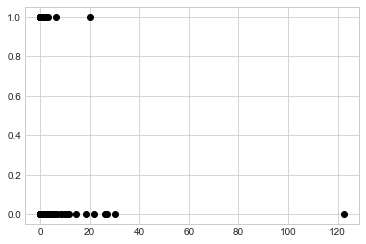

In [10]:
plt.plot(train[2], train_labels, 'o', color='black');

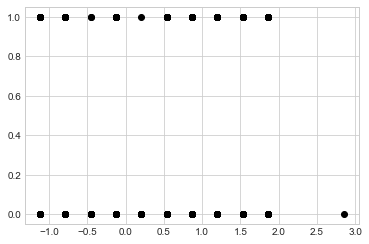

In [11]:
plt.plot(train[6], train_labels, 'o', color='black');

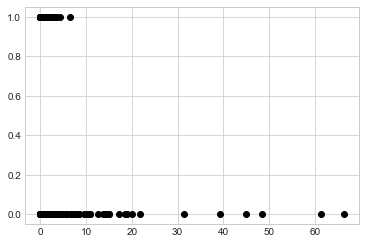

In [12]:
plt.plot(train[67], train_labels, 'o', color='black');

## Підбір Моделі


Для вирішення даної задачі бінарної класифікції я обрав метод опорних векторів. (Експериментуючи з параметрами логарифмічної регресії результати виходили гіршими, ніж за даного методу. Я отримав, що при оптимальному порозі, що тримається на 0.73,  Precision = 0.95, проте Recall всього 0.52 ). Даний метод і справді досить ефективний, особливо при тому, що вибірка в нас не дуже велика. Та і проаналізувавши графіки, отримані вище, можемо зрозуміти, що даний метод і справді гарний варіант.  

Експериментуючи з вибором ядра та параметром регуляризації, я отримав 

In [13]:
SVC_model = SVC( C = 4, kernel ='poly', probability = True)  
SVC_model.fit(train, train_labels.to_numpy().reshape(len(train), ))

SVC(C=4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [14]:
pred2 = SVC_model.predict(train) 
print("Precision: ", precision_score(train_labels, pred2), " / 0.95")
print("Recall: ", recall_score(train_labels,pred2))

Precision:  0.9662650602409638  / 0.95
Recall:  0.5966152129440209


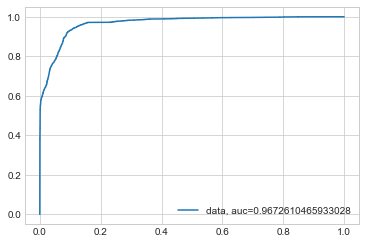

In [15]:
proba = SVC_model.predict_proba(train)[:,1]
fpr, tpr, _ = roc_curve(train_labels,  proba)
auc = roc_auc_score(train_labels, proba)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Ну а тепер прогонимо test. 

In [16]:
test["Predictions"] = SVC_model.predict(test)

In [17]:
test.to_csv(r"C:\Users\kosva\Desktop\Робота\Datasets\test_result.csv", header=None)
